In [366]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import scipy
import emcee
import corner
import lalsimulation as ls
import h5py
import snr_calculation as s 
import populations as p

In [384]:
f = h5py.File('./results/nosample_test_run.h5', 'r')


In [385]:
f['mcmc']['chain']

<HDF5 dataset "chain": shape (10000, 14, 7), type "<f8">

In [387]:
samples = np.array(f['mcmc']['chain']).reshape((140000,7))

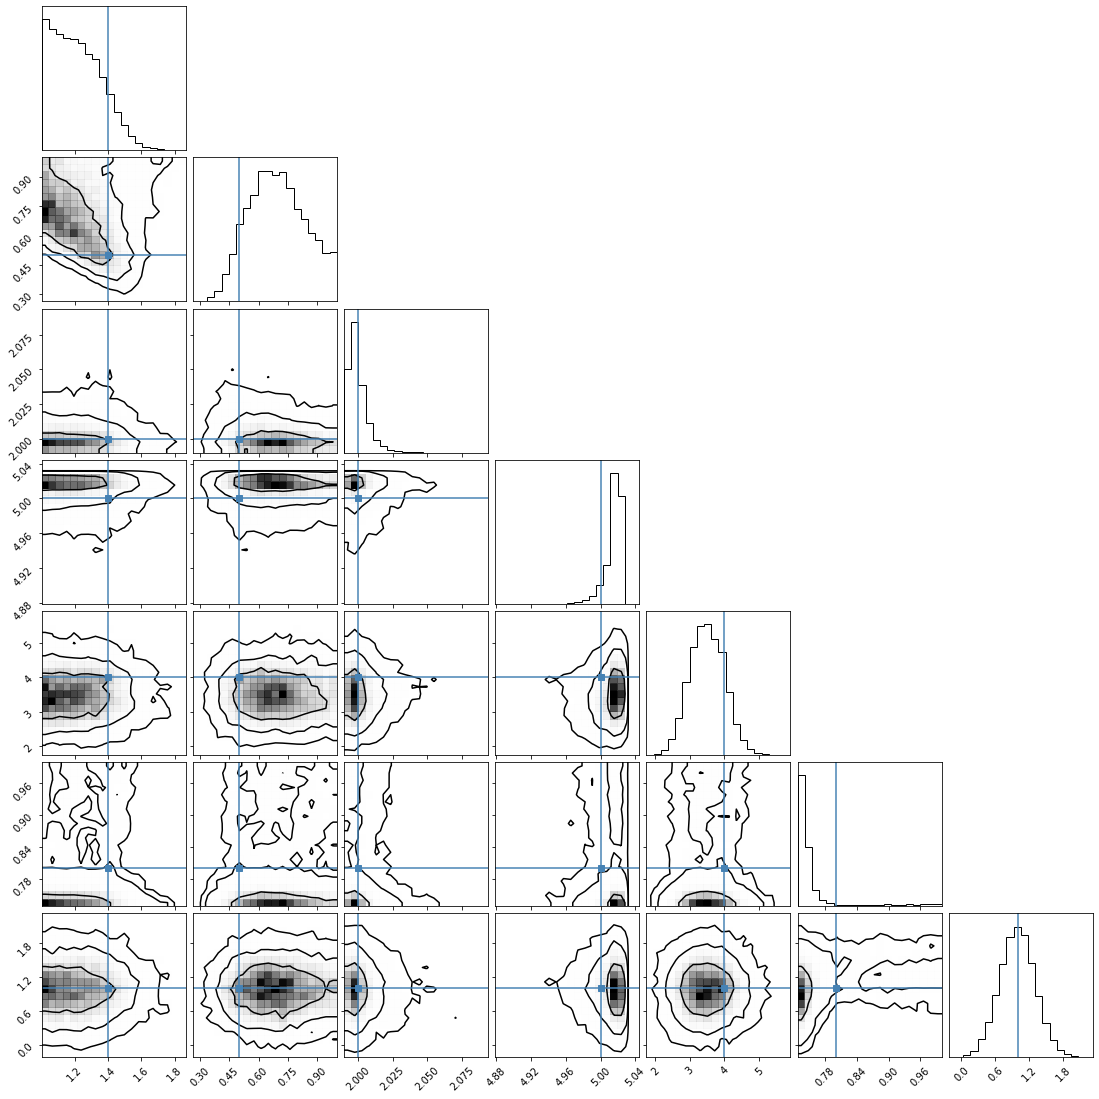

In [389]:
corner.corner(samples, plot_datapoints=False, levels=[0.68, 0.95, 0.997], truths=[1.4, 0.5, 2, 5, 4, 0.8, 1]);

In [112]:
pop = np.genfromtxt('./results/pop_samples.txt')

In [113]:
test.samples=True

In [114]:
pop = pop.reshape((50, 3000, 4))

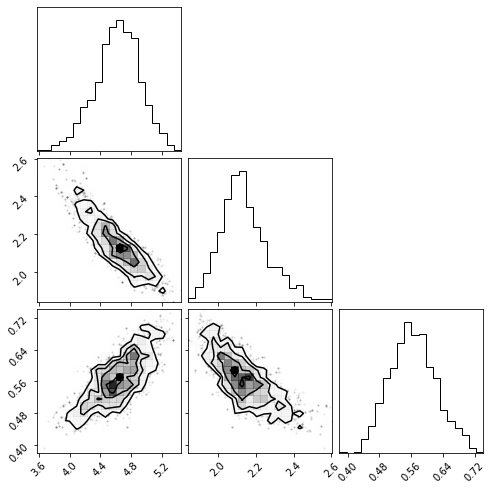

In [116]:
corner.corner(pop[0][:,[0,1,3]]);

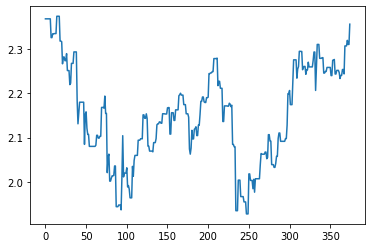

In [111]:
plt.plot(pop[1][::8,1])

In [125]:
test.pop_like(pop, [1.4, 0.5, 2, 1, 3, 5, 4])

-220.07700457719875

In [88]:
test = p.Population([1.4, 0.5, 2, 1, 3, 5, 4], 'nsbh_one', False, selection=True, m1_nospin = True, spinning=True, spin_params=[1, 0])

vary slope: False
selection: True
spinning: True
no m1 spin: True


In [321]:
test = p.Population([1.4, 0.5, 2, 0, 3], 'one', False, selection=False, m1_nospin = True, spinning=False)

vary slope: False
selection: False
spinning: False
no m1 spin: True


In [310]:
pop = test.get_population(10000, False)

1.0


In [369]:
data = p.generate_truncnormal(10000,1.4, 0.5, 1, 2)

In [311]:
data = pop[:,:,0].squeeze()

In [380]:
pop = test.get_population(1000, False)
data = pop[:,:,0].squeeze()
data2 = pop[:,:,1].squeeze()
mus = np.linspace(1.2, 1.6)
sigmas = np.linspace(0.2, 0.7)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=np.sum(np.log(p.truncnormal_like(data, mus[i], sigmas[j], 1, 2) * p.like_m2(data2, data, 1, 3))) #pop[:,:,0].squeeze()

1.0


[  1.           1.99784023   2.98903023 ... 135.1032793  135.1032793
 135.1032793 ]
[0.68 0.95]


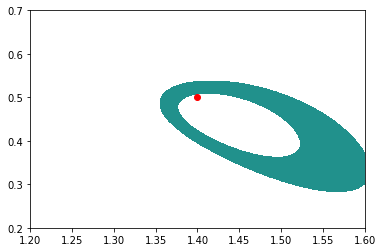

In [381]:
plt.contourf(np.exp(results-np.max(results)), extent=[np.min(mus), np.max(mus), np.min(sigmas), np.max(sigmas)], levels=credible_levels(np.exp(results-np.max(results)).flatten(), np.array([0.68, 0.95])))
plt.scatter(1.4, 0.5, c='r')

In [ ]:
pop = test.get_population(1000, False)
data = pop[:,:,0].squeeze()
data2 = pop[:,:,1].squeeze()
mus = np.linspace(1.2, 1.6)
sigmas = np.linspace(0.2, 0.7)
results = np.zeros((50,50))
for i in range(50):
    print(i)
    for j in range(50):
        results[i,j]=test.pop_like(pop, params=[mus[i], sigmas[j], 2]) #pop[:,:,0].squeeze()

[  1.           1.98104363   2.95841679 ... 145.38011032 145.38011032
 145.38011032]
[0.68 0.95]


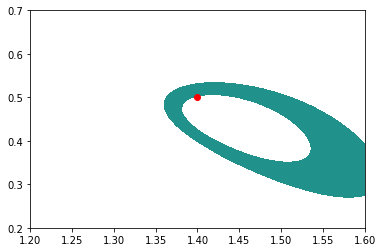

In [368]:
plt.contourf(np.exp(results-np.max(results)), extent=[np.min(mus), np.max(mus), np.min(sigmas), np.max(sigmas)], levels=credible_levels(np.exp(results-np.max(results)).flatten(), np.array([0.68, 0.95])))
plt.scatter(1.4, 0.5, c='r')

In [241]:
def credible_levels(ps, fs):
    """Find the probability levels that correspond to a given array of credible levels, e.g. to then pass into the levels argument of a contour plot
    Parameters:
       ps (1-d numpy array):
          the PDF values, a flattened array
       fs (1-d numpy array):
          the desired credible levels in ascending order, e.g. array([0.5,0.9]) for 50% and 90% credible levels
    """
    sorter = np.argsort(ps)
    ps_sorted = ps[sorter]
    ps_sorted = ps_sorted[::-1] #largest to smallest
    csum = np.cumsum(ps_sorted)
    print(csum)
    print(fs) 
    idxs = np.searchsorted(csum,fs*csum[-1])
    levels = ps_sorted[idxs]
    levels = levels[::-1]
    return levels

In [73]:
a, b = test.infer(pop, fixed={"m_TOV":2, "bh_min": 5, "bh_slope": 4, "max_jjkep": 1, "spin_slope": 1}, steps=1000)

 40%|████      | 401/1000 [00:44<01:12,  8.27it/s]/mnt/c/users/christine/gwcosmology/spin!!/populations.py:1020: RuntimeWarning: divide by zero encountered in log
  result = np.sum([np.log(self.event_likelihood_one_single(i, params)/mu) for i in samples])
100%|██████████| 1000/1000 [01:56<00:00,  8.57it/s]


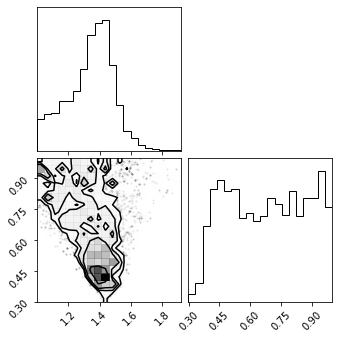

In [74]:
corner.corner(a[:,[0,1]]);

In [64]:
mus = np.linspace(1, 2)
sigmas = np.linspace(0.1, 1.0)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=test.pop_like(pop, [mus[i], sigmas[j], 2, 5, 4, 1, 1])

In [75]:
mus = np.linspace(1, 2)
sigmas = np.linspace(0.1, 1.0)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=test.pop_like(pop, [mus[i], sigmas[j], 2, 5, 4, 1, 1])

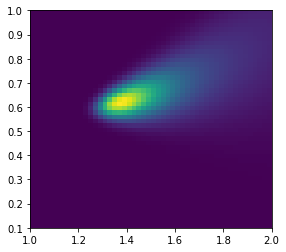

In [76]:
plt.imshow(np.exp(results), extent=[1,2,0.1,1.0])

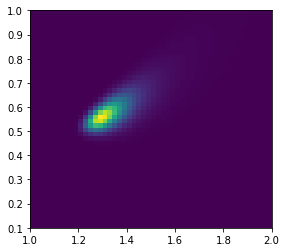

In [68]:
plt.imshow(np.exp(results), extent=[1,2,0.1,1.0])